<a href="https://colab.research.google.com/github/mrutyunjaya-m-muduli/ProjectRepo/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.getOrCreate()

In [ ]:
import sys
import re
import collections
import numpy as np
import pandas as pd
import pickle
import csv

from pyspark.sql.functions import regexp_replace, trim, col, lower, split, explode


from pyspark import SparkContext, SparkConf

from pyspark.sql import SQLContext

sc.stop()
stopWords = ['a','about','above','after','again','against','all','am'
,'an'
,'and'
,'any'
,'are'
,"arent"
,'as'
,'at'
,'be'
,'because'
,'been'
,'before'
,'being'
,'below'
,'between'
,'both'
,'but'
,'by'
,"cant"
,'cannot'
,'could'
,"couldnt"
,'did'
,"didnt"
,'do'
,'does'
,"doesnt"
,'doing'
,"dont"
,'down'
,'during'
,'each'
,'few'
,'for'
,'from'
,'further'
,'had'
,"hadnt"
,'has'
,"hasnt"
,'have'
,"havent"
,'having'
,'he'
,"hed"
,"hell"
,"hes"
,'her'
,'here'
,"heres"
,'hers'
,'herself'
,'him'
,'himself'
,'his'
,'how'
,"hows"
,'i'
,"id"
,"ill"
,"im"
,"ive"
,'if'
,'in'
,'into'
,'is'
,"isnt"
,'it'
,"its"
,'its'
,'itself'
,"lets"
,'me'
,'more'
,'most'
,"mustnt"
,'my'
,'myself'
,'no'
,'nor'
,'not'
,'of'
,'off'
,'on'
,'once'
,'only'
,'or'
,'other'
,'ought'
,'our'
,'ours',	'ourselves'
,'out'
,'over'
,'own'
,'same'
,"shant"
,'she'
,"shed"
,"shell"
,"shes"
,'should'
,"shouldnt"
,'so'
,'some'
,'such'
,'than'
,'that'
,"thats"
,'the'
,'their'
,'theirs'
,'them'
,'themselves'
,'then'
,'there'
,"theres"
,'these'
,'they'
,"theyd"
,"theyll"
,"theyre"
,"theyve"
,'this'
,'those'
,'through'
,'to'
,'too'
,'under'
,'until'
,'up'
,'very'
,'was'
,"wasnt"
,'we'
,"wed"
,"well"
,"were"
,"weve"
,'were'
,"werent"
,'what'
,"whats"
,'when'
,"whens"
,'where'
,"wheres"
,'which'
,'while'
,'who'
,"whos"
,'whom'
,'why'
,"whys"
,'with'
,"wont"
,'would'
,"wouldnt"
,'you'
,"youd"
,"youll"
,"youre"
,"youve"
,'your',
"yours","yourself",'-',':',';',' ','','mr','said']
 

	
	# create Spark context with necessary configuration
sc = SparkContext("local","PySpark Word Count Exmaple")
	
	# read data from text file and split each line into words
words = sc.textFile("/content/drive/MyDrive/nytimes_news_articles.txt").flatMap(lambda line: line.split(" "))
  
  # removing Punctuation
def removePunctuation(text):
  return re.sub(re.compile(r'[^a-zA-Z0-9\s]'),"",text).lower().strip()

punctrem = words.map(removePunctuation)

  #Removing stop words

filtered = punctrem.filter(lambda x: x.lower() not in stopWords)
	
	# count the occurrence of each word
wordCount = filtered.map(lambda word:(word, 1)).reduceByKey(lambda a,b:a +b)
 
#def wordCount(wordListDF):
  #return wordListDF.groupBy('word').count()

#wordsDF = sqlContext.createDataFrame([filtered], ['word'])

#wordCountsDF = (wordsDF.groupBy(wordsDF.word).count())

#wordCounts = wordCount(filtered).orderBy(['count'],ascending=False)
wordCount.take(10)
	# save the counts to output
#wordCount.saveAsTextFile("/content/drive/MyDrive/CP_2")
#counted= collections.Counter(filtered)

#words =[]
#counts =[]

 #ranking the frequent words
wordCount=wordCount.map(lambda x:(x[1],x[0]))
wordCount.sortByKey(False).take(10)

top100=wordCount.sortByKey(False).take(100)



#with open('/content/drive/MyDrive/out_tasko.txt', 'wb') as fp:
    #pickle.dump(wordCount.take(100), fp)

#rdd_list = SparkContext.parallelize(wordCount.sortByKey(False).take(100))
#rdd_list.coalesce(1).map(lambda row: str(row)).saveAsTextFile("/content/drive/MyDrive/out_task")

#fields=['count','word']
#with open('/content/drive/MyDrive/out_tasko1', 'w') as f:
  #write = csv.writer(f)
  #write.writerow(fields)
  #write.writerow(top100)
#np.savetxt("/content/drive/MyDrive/out_tasko2.csv", top100, delimiter=",", fmt='%s', header=header)

with open("/content/drive/MyDrive/out_tasktest1.csv", "w") as f:
    for s in top100:
        f.write(str(s) +"\n")

[(73, 'state'),
 (44, 'islamic'),
 (39, 'last'),
 (39, 'wednesday'),
 (37, 'new'),
 (36, 'city'),
 (32, 'also'),
 (31, 'year'),
 (31, 'one'),
 (30, 'many')]

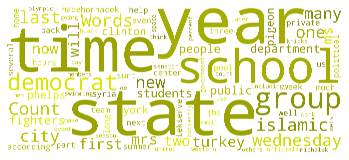

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content=open ("/content/drive/MyDrive/out_task1.csv").read()

wordcloud = WordCloud(
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 16000,
                            height = 7000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import collections
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import rcParams

import matplotlib.pyplot as plt
import matplotlib.cm as cm

dataset = pd.read_csv("/content/drive/MyDrive/out_tasktest1.csv", encoding = 'latin-1')
dataset.columns


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False ).generate(dataset)
# Plot
plot_cloud(wordcloud)


TypeError: ignored

In [ ]:
import re,os,sys
import _io
urls=[]
lineurl=[]
with open("/content/drive/MyDrive/nytimes_news_articles (2).txt") as file:
  for line in file:
    url = re.findall('(https?://\S+)',line)
    if url!=[]:
      urls.append("".join(url))
      lineurl.append("URL: "+"".join(url))
for url in urls:
  print(url)  
print(lineurl)  

Streaming output truncated to the last 5000 lines.
http://www.nytimes.com/2016/05/29/magazine/a-soviet-era-mind-set-at-the-market.html
http://www.nytimes.com/2016/05/29/magazine/judge-john-hodgman-on-pet-raccoons.html
http://www.nytimes.com/2016/05/29/magazine/how-to-pan-for-gold.html
http://www.nytimes.com/2016/05/29/magazine/the-5-816-issue.html
http://www.nytimes.com/2016/05/29/fashion/weddings/one-tsa-line-worth-the-wait.html
http://www.nytimes.com/2016/05/29/realestate/moving-to-the-bronx.html
http://www.nytimes.com/2016/05/29/upshot/waiting-in-line-for-the-illusion-of-security.html
http://www.nytimes.com/2016/05/29/fashion/modern-love-tech-relationship-trial.html
http://www.nytimes.com/2016/05/29/movies/1940s-dispatches-from-the-land-of-wynken-blynken-and-noir.html
http://www.nytimes.com/2016/05/29/arts/dance/a-warm-place-for-choreographers-to-grow-at-american-dance-institute-incubator.html
http://www.nytimes.com/2016/05/29/arts/design/rembrandts-first-masterwork-on-display-at-th